# 6.1读写文本格式的数据

pandas提供了一些运用于表格数据读取为DataFrame的函数。下表对他们进行了总结

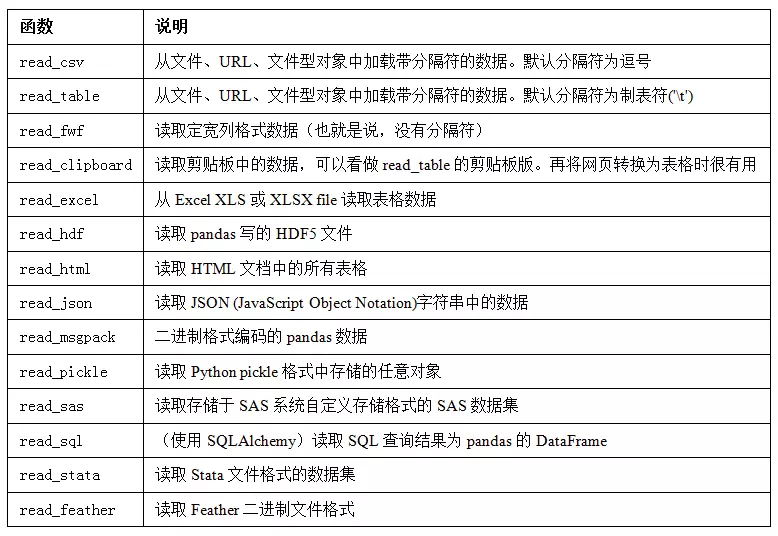

我们将函数选项可以划分为以下几类
- 索引:将一个或多个列当做返回的DataFrame处理，以及是否从文件、用户获取列名w
- 类型名和数据转换：包括用户定义值的转换、自定义的缺失值标记列表等
- 日期解析：包括组合功能，比如将分散在多个列中的日期 信息组合成结果中的单个列
- 迭代：支持对大文件进行逐块迭代
- 不规则数据问题：跳过一些行、页脚、注释或其他一些不重要的问题

In [3]:
import pandas as pd
df = pd.read_csv('examples/ex1.csv')
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


我们还可以使用read_table

In [12]:
pd.read_table('examples/ex1.csv',sep=',')

C:\Users\lsz\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


我们可以用pandas为文件分配默认的列名，也可以自定义列名，ex2.csv为没有列名的文件

In [13]:
pd.read_csv('examples/ex2.csv',header=None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [14]:
pd.read_csv('examples/ex2.csv',names=['a','b','c','d','message'])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


假设你希望message列也做成DataFarme的索引。你可以明确表示将该列放到索引四的位置上，也可以通过index_col参数指定为message

In [15]:
names = ['a','b','c','d','message']
pd.read_csv('examples/ex2.csv',names=names,index_col = 'message')

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


如果希望将多个列做成一个层次化索引，只需传入由列编号或列名做成的列表即可

In [23]:
!type examples/csv_mindex.csv

命令语法不正确。


In [25]:
parsed = pd.read_csv('examples/csv_mindex.csv',index_col=['key1','key2'])
parsed

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

有些情况下，有的表格文件不是用固定的分隔符去分隔字段的(比如空白字符或其它模式)。看看下面这个文件

In [26]:
list(open('examples/ex3.txt'))

['            A         B         C\n',
 'aaa -0.264438 -1.026059 -0.619500\n',
 'bbb  0.927272  0.302904 -0.032399\n',
 'ccc -0.264273 -0.386314 -0.217601\n',
 'ddd -0.871858 -0.348382  1.100491\n']

这段字符是被不同的空格字符隔开的。这种情况下你可以传递一个正则表达式作为read_table的分隔符/s+

In [28]:
result = pd.read_table('examples/ex3.txt',sep = '\s+')
result

C:\Users\lsz\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


这里，由于列名比数据行的数量少，所以read_table推断第一列应该是DataFrame的索引。
这些解析器函数还有许多参数可以帮助你处理各种各样的异形文件格式（表6-2列出了一些）。比如说，你可以用skiprows跳过文件的第一行、第三行和第四行：

In [29]:
!type examples/ex4.csv

命令语法不正确。


    # hey!
    a,b,c,d,message
    # just wanted to make things more difficult for you
    # who reads CSV files with computers, anyway?
    1,2,3,4,hello
    5,6,7,8,world
    9,10,11,12,foo

In [30]:
pd.read_csv('examples/ex4.csv',skiprows=[0,2,3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [31]:
!type examples/ex5.csv

命令语法不正确。


    something,a,b,c,d,message
    one,1,2,3,4,NA
    two,5,6,,8,world
    three,9,10,11,12,foo

In [32]:
result = pd.read_csv('examples/ex5.csv')
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [33]:
pd.isnull(result)

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


na_values可以用一个列表或集合的字符串表示缺失值

In [36]:
result = pd.read_csv('examples/ex5.csv',na_values = ['NULL'])
result

,something,a,b,c,d,message
0,one,1,2,NaN,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


字典的各列可以使用不同的NA值

In [38]:
sentinels = {'message':['foo','NA'],'something':['two']}
pd.read_csv('examples/ex5.csv',na_values = sentinels)

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,NaN,5,6,NaN,8,world
2,three,9,10,11.0,12,NaN


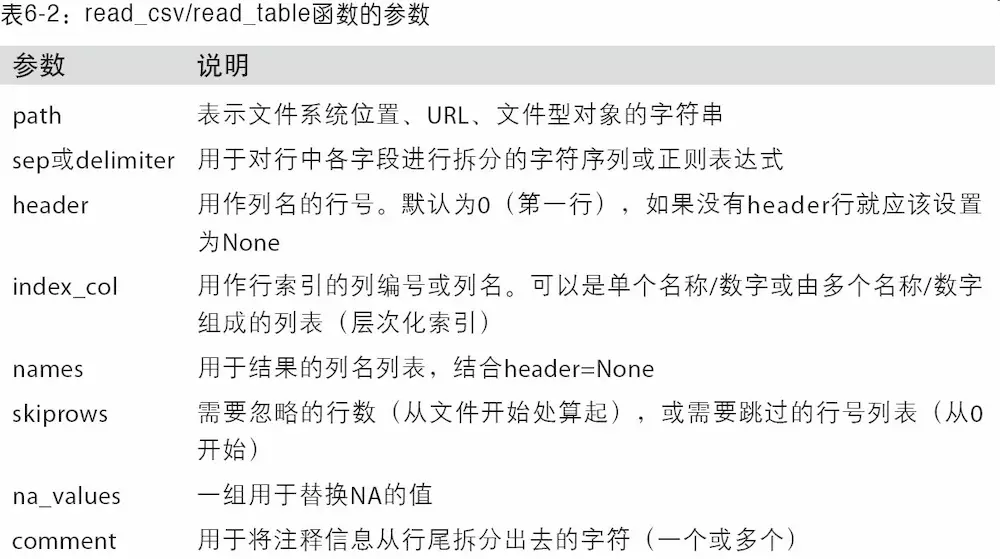

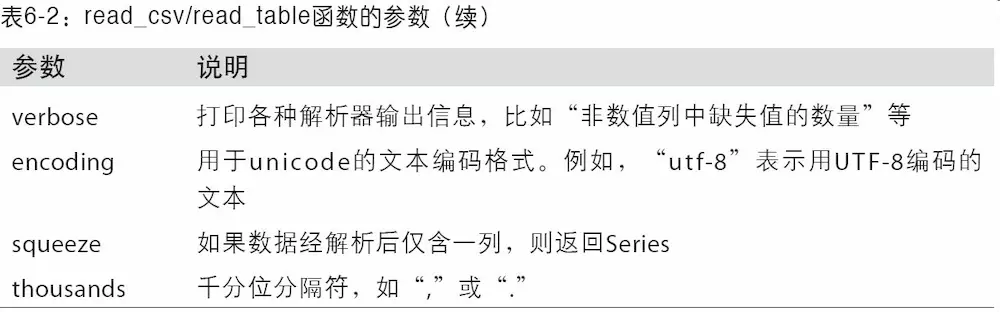

### 逐块读取文本文件

在处理很大的文件时，或找出大文件中的参数集以便后续处理，可能只想读取文件的一小部分或逐块对文件进行迭代

在大文件之前，我们先设置pandas显示更紧些：

In [42]:
pd.options.display.max_rows = 10

然后有：

In [43]:
result = pd.read_csv('examples/ex6.csv')
result

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
...,...,...,...,...,...
9995,2.311896,-0.417070,-1.409599,-0.515821,L
9996,-0.479893,-0.650419,0.745152,-0.646038,E
9997,0.523331,0.787112,0.486066,1.093156,K
9998,-0.362559,0.598894,-1.843201,0.887292,G


In [46]:
#如果想读几行（避免读取几行文件），通过nrows进行指定即可
pd.read_csv('examples/ex6.csv',nrows=5)

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


In [51]:
#若逐块读取文件，可以指定chunksize（行数）：
chunker = pd.read_csv('examples/ex6.csv', chunksize=1000)

tot = pd.Series([])
for piece in chunker:
    tot = tot.add(piece['key'].value_counts(), fill_value=0)

tot = tot.sort_values(ascending=False)

In [52]:
tot

E    368.0
X    364.0
L    346.0
O    343.0
Q    340.0
     ...  
5    157.0
2    152.0
0    151.0
9    150.0
1    146.0
Length: 36, dtype: float64

### 将数据写出到文本格式

数据也可以被输出为分隔符格式的文本。我们再来看看之前读过的一个CSV文件：

In [53]:
data = pd.read_csv('examples/ex5.csv')
data

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


利用DataFrame的to_csv的方法，我们可以将数据写到一个以逗号分隔的文件中

In [54]:
data.to_csv('examples/out.csv')

当然，还可以使用其他分隔符（由于这里直接写出到sys.stdout，所以仅仅是打印出文本结果而已）：

In [56]:
import sys
data.to_csv(sys.stdout,sep='|')

|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo


缺失值在输出结果中会被表示为空字符串。你可能希望将其表示为别的标记

In [57]:
data.to_csv(sys.stdout,na_rep='NULL')

,something,a,b,c,d,message
0,one,1,2,3.0,4,NULL
1,two,5,6,NULL,8,world
2,three,9,10,11.0,12,foo


如果没有设置其他选项，则会写出行和列的标签。当然，它们也都可以被禁用：

In [58]:
data.to_csv(sys.stdout,index=False,header=False)

one,1,2,3.0,4,
two,5,6,,8,world
three,9,10,11.0,12,foo


还可以只写出一部分的列，并以你指定的顺序排列

In [59]:
data.to_csv(sys.stdout,index=False,columns=['a','b','c'])

a,b,c
1,2,3.0
5,6,
9,10,11.0


Series也有一个to_csv方法

In [61]:
import numpy as np
dates = pd.date_range('1/1/2000',periods=7)
ts = pd.Series(np.arange(7),index=dates)
ts.to_csv('examples/tseries.csv')

C:\Users\lsz\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.


In [62]:
!type examples/tseries.csv

命令语法不正确。


    2000-01-01,0
    2000-01-02,1
    2000-01-03,2
    2000-01-04,3
    2000-01-05,4
    2000-01-06,5
    2000-01-07,6

### 处理分隔符

大部分存储在磁盘上的文件表格数据都能用pandas.read_table进行加载。然而，有时还是需要做一些手工处理。由于接受到含有畸形行的文件使得read_table出毛病的情况并不少见。为了说明基本工具，看看下面的CSV文件

In [63]:
!type examples/ex7.csv

命令语法不正确。


    "a","b","c"
    "1","2","3"
    "1","2","3"

对于任何单字符分隔文件，可以直接使用python内置的csv模块。将任意已打开的文件或文件型的对象传给csv.reader:

In [70]:
import csv
f = open('examples/ex7.csv')

reader = csv.reader(f)

对这个reader进行迭代将会为每行产生一个元组（并移除了所有引号）：对这个reader进行迭代将会每行产生一个元组（并移除了所有的引号）：

In [66]:
for line in reader:
    print(line)

['a', 'b', 'c']
['1', '2', '3']
['1', '2', '3']


现在，为了使数据格式合乎要求，你需要对其做一些整理工作。接下来将一步一步的做。首先我们要读取文件到一个多行的列表中

In [67]:
with open('examples/ex7.csv') as f:
    lines = list(csv.reader(f))


[['a', 'b', 'c'], ['1', '2', '3'], ['1', '2', '3']]

In [68]:
#然后我们将这些行分为标题行和数据行
header,values = lines[0],lines[1:]
#  用zip（*values），后者将行转置为列，创建数据列的字典：
data_dict = {h:v for h,v in zip(header,zip(*values))}
data_dict

{'a': ('1', '1'), 'b': ('2', '2'), 'c': ('3', '3')}

csv文件的形式有很多。只需要csv.Dialect的一个子类即可定义出新格式（如专门的分隔符、字符串引用约定、行结束等）

In [71]:
class my_dialect(csv.Dialect):
    lineterminator = '\n'
    delimiter = ';'
    quotechar = '"'
    quoting = csv.QUOTE_MINIMAL
reader = csv.reader(f,dialect = my_dialect)

In [74]:
#各个csv语支的参数也可以用关键字的形式提供csv.reader,而无需定义子类
reader = csv.reader(f,delimiter = '|')

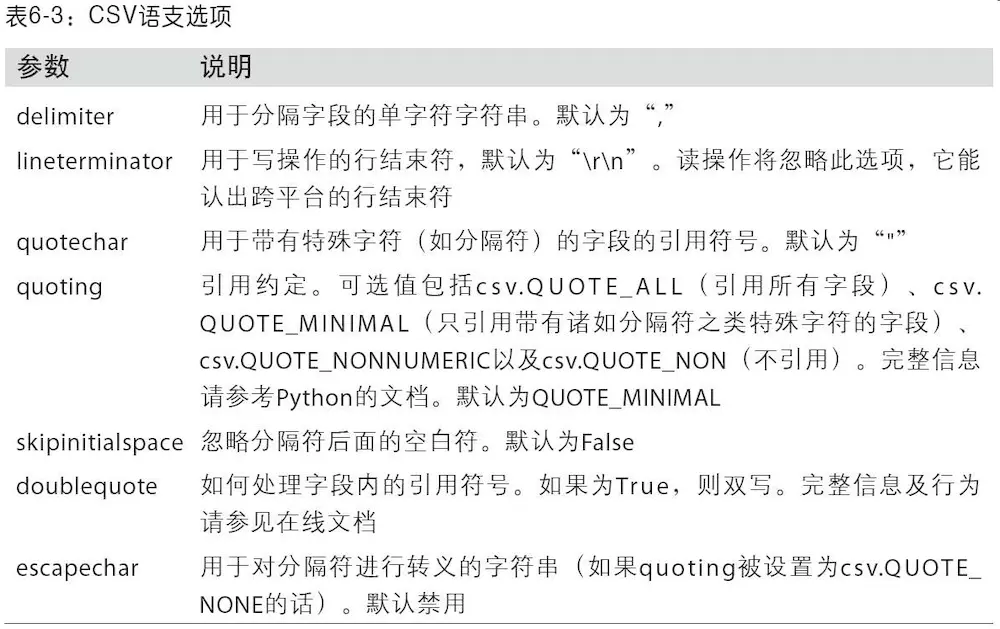

要手工输出分隔符文件，你可以使用csv.write。它接受一个已打开且可写的文件对象以及csv.reader相同的那些语支和格式化文件

In [ ]:
with open('mydata.csv','w') as f:
    writer = csv.writer(f,dialect=my_dialect)
    writer.writerow

### json数据

In [75]:
obj = '''
{"name": "Wes",
 "places_lived": ["United States", "Spain", "Germany"],
 "pet": null,
 "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
              {"name": "Katie", "age": 38,
               "pets": ["Sixes", "Stache", "Cisco"]}]
}
'''

除却空值null和一些其他的细微差别（如列表末尾不允许在多余的逗号）之外，json非常接近于有效的python代码。基本类型有对象（字典）、数组（列表）、字符串、数组、布尔值以及null。对象中所有的键都必须是字符串。许多python库都可以读写

In [77]:
import json
result = json.loads(obj)
result

{'name': 'Wes',
 'places_lived': ['United States', 'Spain', 'Germany'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 30, 'pets': ['Zeus', 'Zuko']},
  {'name': 'Katie', 'age': 38, 'pets': ['Sixes', 'Stache', 'Cisco']}]}

json.dumps则将Python对象转化为json

In [78]:
asjson = json.dumps(result)

In [79]:
siblings = pd.DataFrame(result['siblings'],columns=['name','age'])
siblings

,name,age
0,Scott,30
1,Katie,38


pandas.read_json可以自动将特别格式的json数据集转换为Series或DataFrame。eg:

In [80]:
!type examples/example.json

命令语法不正确。


    [{"a": 1, "b": 2, "c": 3},
     {"a": 4, "b": 5, "c": 6},
     {"a": 7, "b": 8, "c": 9}]

In [81]:
data = pd.read_json('examples/example.json')
data

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


如果需要将数据从pandas输出json，可以使用to_json方法

In [82]:
print(data.to_json())

{"a":{"0":1,"1":4,"2":7},"b":{"0":2,"1":5,"2":8},"c":{"0":3,"1":6,"2":9}}


In [83]:
print(data.to_json(orient='records'))

[{"a":1,"b":2,"c":3},{"a":4,"b":5,"c":6},{"a":7,"b":8,"c":9}]


In [86]:
pip install beautifulsoup4 html5lib

Note: you may need to restart the kernel to use updated packages.


In [88]:
tables = pd.read_html('examples/fdic_failed_bank_list.html')
len(tabels)

1

pandas.read_html由一些选项，默认条件下，他会搜索、尝试解析<table>标签内的表格数据。结果就是一个列表的DataFrame

In [89]:
failures = tables[0]
failures.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Allied Bank,Mulberry,AR,91,Today's Bank,"September 23, 2016","November 17, 2016"
1,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,"August 19, 2016","November 17, 2016"
2,First CornerStone Bank,King of Prussia,PA,35312,First-Citizens Bank & Trust Company,"May 6, 2016","September 6, 2016"
3,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,"April 29, 2016","September 6, 2016"
4,North Milwaukee State Bank,Milwaukee,WI,20364,First-Citizens Bank & Trust Company,"March 11, 2016","June 16, 2016"


这里我们可以做一些数据清洗和分析。比如计算按年份计算倒闭的银行数

In [90]:
close_timestamps = pd.to_datetime(failures['Closing Date'])
close_timestamps

0     2016-09-23
1     2016-08-19
2     2016-05-06
3     2016-04-29
4     2016-03-11
         ...    
542   2001-07-27
543   2001-05-03
544   2001-02-02
545   2000-12-14
546   2000-10-13
Name: Closing Date, Length: 547, dtype: datetime64[ns]

### 利用lxml.objectify解析XML

    XML（Extensible Markup Language）是另一种常见的支持分层、嵌套数据及元数据的结构化数据格式。本书使用的文件来自于一个很大的XML文档
    

In [2]:
from lxml import objectify

path = 'datasets/mta_perf/Performance_MNR.xml'
parsed = objectify.parse(open(path))
root = parsed.getroot()

# 二进制数据格式

实现数据的高效二进制格式存储最简单的办法就是用python内置的pickle序列化。pandas对象都有一个用于将数据pickle格式保存到磁盘上的to_pickle方法

In [4]:
frame = pd.read_csv('examples/ex1.csv')
frame

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [5]:
frame.to_pickle('examples/frame_pickle')

可以通过pickle直接读取被pickle化的数据，或是更方便的pandas.reaed_pickle

In [6]:
pd.read_pickle('examples/frame_pickle')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


''' 注意：pickle仅建议用于短期存储格式。其原因是很难保证该格式永远是稳定的；今天pickle的对象可能无法被后续版本的库unpickle出来。虽然我尽力保证这种事情不会发生在pandas中，但是今后的某个时候说不定还是得“打破”该pickle格式'''

### HDF5文件

HDF5是一种存储大规模科学数组数据的非常好的文件格式。它可以被作为C标准库，带有许多语言的接口，如Java、Python和MATLAB等。HDF5中的HDF指的是层次型数据格式（hierarchical data format）。每个HDF5文件都含有一个文件系统式的节点结构，它使你能够存储多个数据集并支持元数据。与其他简单格式相比，HDF5支持多种压缩器的即时压缩，还能更高效地存储重复模式数据。对于那些非常大的无法直接放入内存的数据集，HDF5就是不错的选择，因为它可以高效地分块读写。
虽然可以用PyTables或h5py库直接访问HDF5文件，pandas提供了更为高级的接口，可以简化存储Series和DataFrame对象。HDFStore类可以像字典一样，处理低级的细节：


In [14]:
import numpy as np
import pkuseg
frame = pd.DataFrame({'a':np.random.randn(100)})
store = pd.HDFStore('mydata.h5')
store['obj1'] = frame
store['obj1_col'] = frame['a']
store

ModuleNotFoundError: No module named 'pkuseg'

In [ ]:
pip install pkuseg

In [9]:
pip install --upgrade tables

Note: you may need to restart the kernel to use updated packages.
